# Introdução à Ciência de Dados - UFPB 
#### Professor: Yuri Malheiros
## Projeto Final   

<img src="formula_1.png" style="width:500px;height:125px"/>

**Caio Araújo - 20200024082  
William Xavier - 20200023960**

## Introdução

Neste projeto analisaremos diversos dados sobre as corridas de Fórmula 1 desde seu início em 1950 até 2020, dados como: maiores vencedores, números de acidentes e a evolução das velocidades com o passar dos anos. Nossa **motivação** e **objetivo** é demonstrar a riqueza dos dados que são gerados a partir das corridas e a evolução deste esporte, que movimenta milhares espectadores pelo mundo, assim como suas mudanças.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
sns.set_palette('Set2')

## Dados Utilizados

13 datasets foram utilizados tirados do site Kaggle, são dados de diferentes "setores" das corridas como: circuitos, pilotos, montadoras, resultados, classificações, pit-stop, etc. Além disso, realizamos uma busca pelas mudanças das regras na Fórmula 1 e utilizamos informações contidas no regulamento de 2011.  
**Links:**  
 * Datasets: [Datasets](https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020)  
 * Regulamento 2011: [Regulamento 2011](https://esporte.ig.com.br/automobilismo/f1/regulamento/)
  

## Pré-processamento

Os datasets escolhidos possuem muitas colunas que não utilizamos em nossa análise, por isso foi necessário fazermos uma limpeza dos dados. 

**Maiores Vencedores:**
* Nos dataframes referentes aos "Maiores Vencedores", tiramos as colunas que não eram necessárias, usamos uma máscara para deixar apenas os pilotos que haviam vencido as corridas e também o groupby para realizar a contagem das vitórias. Também calculamos as medidas de centralidade e dispersão e fizemos um gráfico de barra para facilitar a visualização dos dados.

**Acidentes:**
* Na análise dos acidentes foi necessário mesclar 2 datasets, além disso somamos 2 status _(um dataset possui um tipo de legenda para status de acontecimentos durante um GP. Ex. Vitória, acidente, colisão, etc)_ que foram os de colisões e acidentes, não sabemos ao certo o critério que o autor dos dados utilizou para classificar esses acontecimentos, por isso somamos os 2 para realizar a análise. Além disso utilizamos um gráfico de linha que permitiu vermos os anos em que tivemos altas e baixas na quantidade de acidentes.

**Fórmula 1 - Velocidades**
* No dataframe que utilizamos como base para calcular as mudanças das velocidades tivemos que mesclar 3 datasets para obtermos os dados necessários, juntamente com isso fizemos a limpeza de algumas colunas, dados nulos e dados repetidos. Utilizamos um gráfico de linha que nos permitiu observar a evolução das velocidades a cada ano em determinados GP's. 

**Cálculo Z-score**
* No dataframe utilizado para calcular o z-score precisamos transformar o tipo dos elementos da coluna "time", que era _string_ para o tipo _time_ , pra isso tivemos que transformar usando o `to_datetime` e depois criamos uma coluna com os segundos de acordo com o tempo obtido da transformação, era preciso realizar esse processo para conseguirmos calcular a média e consequentemente o z-score, uma vez que não é possível calcular a média com dados do tipo _time_ .



# Perguntas:
## Quais pilotos venceram mais corridas desde 1950 até 2020 ?

In [2]:
results = pd.read_csv("../../caiov/ICD/projeto_csv/results.csv")
drivers = pd.read_csv("../../caiov/ICD/projeto_csv/drivers.csv")

In [3]:
results = results.drop(["statusId", "points", "positionText", "number", "position", "milliseconds"], axis=1)
results = results.rename(columns={"positionOrder":"Vitórias_P"})
results = results[results.Vitórias_P == 1]

drivers = drivers.loc["0":,"driverId":"nationality"]
drivers["Pilotos"] = drivers["forename"] + " " + drivers["surname"]
drivers = drivers.drop(["dob","number","forename","surname"], axis=1)
drivers = drivers.reindex(columns=['driverId','driverRef','code','Pilotos','nationality'])

drivers_results = pd.merge(drivers,results, on="driverId")

drivers_wins = drivers_results.groupby("Pilotos").count()
drivers_wins = drivers_wins.sort_values(by="Vitórias_P", ascending=False)[["Vitórias_P"]]
d_w_barplot = drivers_wins.iloc[:10]
drivers_wins.iloc[:15]

,Vitórias_P
Pilotos,
Lewis Hamilton,96
Michael Schumacher,91
Sebastian Vettel,53
Alain Prost,51
Ayrton Senna,41
Fernando Alonso,32
Nigel Mansell,31
Jackie Stewart,27
Niki Lauda,25


<img src="hamilton.jpg" style="width:500px;height:350px"/>

Análise: Vemos que Lewis Hamilton após **15 temporadas** na Fórmula 1, e **267 GP's** disputados, alcançou o recorde do grande campeão Michael Schumacher que era de **91 vitórias** em **308 GP's**, que disputou durante **19 temporadas**, estabelecendo o recorde que atualmente é de **96 vitórias**. Ambos possuem **7 títulos** da Fórmula 1.

## Medidas de Centralidade e Dispersão

In [4]:
Medidas_P = {"Média": drivers_wins["Vitórias_P"].mean(),
                  "Mediana": drivers_wins["Vitórias_P"].median(),
                  "Desvio Padrão": drivers_wins["Vitórias_P"].std()}
medidas_p = pd.Series(Medidas_P)

d_w_medidas = pd.DataFrame({"Vitórias_P": medidas_p})
d_w_medidas

,Vitórias_P
Média,9.445455
Mediana,4.000000
Desvio Padrão,15.269798


Análise: A **média** encontrada a partir desses valores não condiz muito com os dados que vemos em nosso **top 15**, pois há vários
    pilotos que venceram um GP, mas não seguiram vencendo, fazendo com que a média baixe, é por isso que temos um **desvio padrão** tão elevado.

## Boxplot

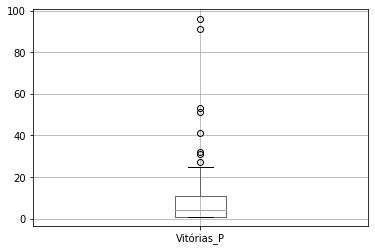

In [5]:
drivers_wins.boxplot(column="Vitórias_P")

## Gráfico de Barra

Text(0.5, 1.0, 'Top 10 Pilotos Vencedores')

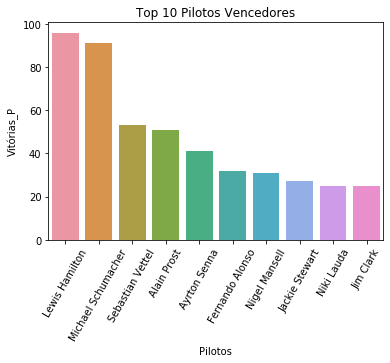

In [6]:
d_w_barplot = d_w_barplot.reset_index()
sns.barplot(data=d_w_barplot, x="Pilotos", y="Vitórias_P")
plt.xticks(rotation=60)
plt.title("Top 10 Pilotos Vencedores")

## Quais montadoras/equipes venceram mais corridas ?

In [7]:
teams = pd.read_csv("../../caiov/ICD/projeto_csv/constructors.csv")

In [8]:
teams_results = pd.merge(teams,results, on="constructorId")
teams_results = teams_results.drop(["constructorRef","url"], axis=1)

teams_results = teams_results.rename(columns={"name":"Equipes"})
teams_results = teams_results.rename(columns={"constructorId":"Vitórias_E"})

teams_wins = teams_results.groupby("Equipes").count()
teams_wins = teams_wins.sort_values(by="Vitórias_E", ascending=False)[["Vitórias_E"]]
t_w_barplot = teams_wins.iloc[:10]
teams_wins.iloc[:15]

,Vitórias_E
Equipes,
Ferrari,239
McLaren,178
Mercedes,116
Williams,114
Red Bull,64
Team Lotus,45
Renault,35
Benetton,27
Brabham,23


<img src="ferrari.jpg" style="width:450px;height:325px"/>

Análise: Aqui vemos a hegemonia no quesito mais vitórias da Ferrari, fundada em 1939 por **Enzo Ferrari**, a equipe **Scuderia Ferrari**
    é a equipe **mais antiga** em atividade na Fórmula 1, é a única a ter competido em todas as temporadas do mundial até hoje.
    Curiosamente a Ferrari só veio a ganhar seu primeiro GP em **1951** na **Grã-Bretanha**, perdendo todos os 11 GP's disputados em
    1950 para a equipe **Alfa Romeo** que mais tarde, em 1951, se retirou da Fórmula 1.
    

## Medidas de Centralidade e Dispersão

In [9]:
Medidas_E = {"Média": teams_wins["Vitórias_E"].mean(),
                  "Mediana": teams_wins["Vitórias_E"].median(),
                  "Desvio Padrão": teams_wins["Vitórias_E"].std()}
medidas_e = pd.Series(Medidas_E)

t_w_medidas = pd.DataFrame({"Vitórias_E": medidas_e})
t_w_medidas

,Vitórias_E
Média,22.586957
Mediana,4.000000
Desvio Padrão,47.768226


Análise: Pelo mesmo motivo citado acima, aqui vemos um **desvio padrão muito elevado** pela quantidade de equipes que já disputaram
    algum GP na fórmula 1, que são 46 equipes listadas nos dados encontrados.

## Boxplot

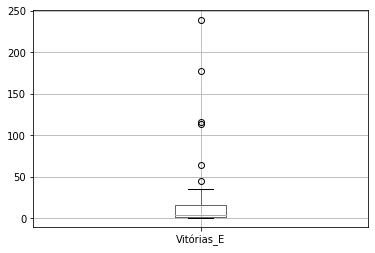

In [10]:
teams_wins.boxplot(column="Vitórias_E")

## Gráfico de Barra

Text(0.5, 1.0, 'Top 10 Equipes Vencedores')

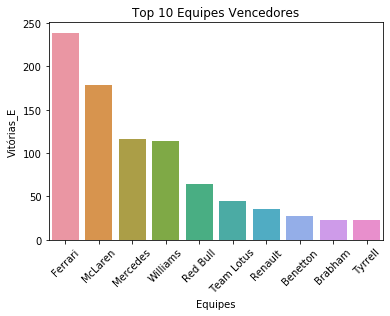

In [11]:
t_w_barplot = t_w_barplot.reset_index()
sns.barplot(data=t_w_barplot, x="Equipes", y="Vitórias_E")
plt.xticks(rotation=45)
plt.title("Top 10 Equipes Vencedores")

## Acidentes + Colisões por Temporada
Com carros que chegam a mais de 300Km/h em uma corrida, a possibilidade de acontecer acidentes neste esporte é grande. É por isso que analisaremos as temporadas que mais ocorreram acidentes na Fórmula 1, e veremos mais tarde medidas que foram tomadas
para evitar que tais acontececem. 

In [12]:
races = pd.read_csv("../../caiov/ICD/projeto_csv/races.csv")
estatistica = pd.read_csv("../../caiov/ICD/projeto_csv/status.csv")
resultados = pd.read_csv("../../caiov/ICD/projeto_csv/results.csv")

df_acidentes = resultados[(resultados.statusId == 3) | (resultados.statusId == 4)]
df_acidentes = df_acidentes.drop(["points", "position", "positionText", "number", "time", "milliseconds", 
                            "fastestLap", "fastestLapTime", "fastestLapSpeed","laps", "rank", "positionOrder"], axis=1)

In [13]:
newdata = pd.merge(races, df_acidentes, on="raceId")
newdata = newdata.drop(["url", "grid", "time", "round", "date", "resultId",
                        "driverId","raceId", "circuitId", "constructorId","name","statusId"], axis=1)
newdata = newdata.rename(columns={"year":"Temporada"})

q_acidentes = np.full((1834), 1)
newdata["Acidentes"]= q_acidentes

newdata = newdata.reset_index(drop=True)
newdata = newdata.groupby("Temporada").sum()
newdata = newdata.sort_values(by="Acidentes", ascending=False)
newdata.iloc[:10]

,Acidentes
Temporada,
1977,63
1975,54
1976,50
1994,49
1978,49
1981,48
2012,43
2010,42
2006,41


Análise: Nestes dados vemos claramente um **alto índice** de acidentes em alguns anos da **década de 70**, em um gráfico que será mostrado abaixo será possível ver o que **possivelmente causou** tantos acidentes neste período.

## Medidas de Centralidade e Dispersão

In [14]:
Medidas_A = {"Média": newdata["Acidentes"].mean(),
                  "Mediana": newdata["Acidentes"].median(),
                  "Desvio Padrão": newdata["Acidentes"].std()}
medidas_a = pd.Series(Medidas_A)

d_a_medidas = pd.DataFrame({"Acidentes": medidas_a})
d_a_medidas

,Acidentes
Média,25.472222
Mediana,25.000000
Desvio Padrão,12.844654


## Boxplot

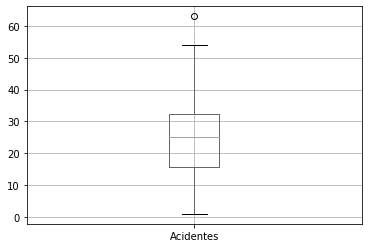

In [15]:
newdata.boxplot(column="Acidentes")

## Histograma

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002399BC37A08>]],
      dtype=object)

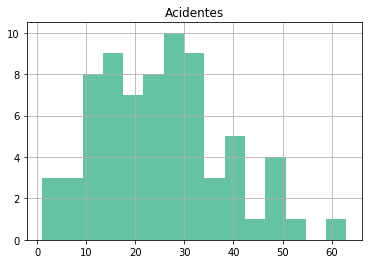

In [16]:
newdata.hist(column="Acidentes", bins=15)

## Gráfico de dispersão (Agrupamento)

In [17]:
newdata = newdata.reset_index()

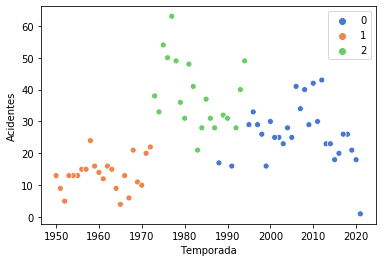

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(newdata)
sns.scatterplot(data=newdata, x="Temporada", y="Acidentes", hue=kmeans.labels_, palette="muted")

## Gráfico de Linha

Text(0.5, 1.0, 'Acidentes por temporada')

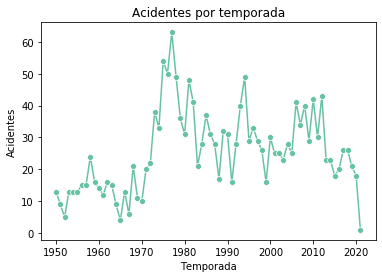

In [19]:
newdata = newdata.reset_index()
sns.lineplot(data=newdata, x="Temporada", y="Acidentes", marker="o")
plt.title("Acidentes por temporada")

Análise: Como citamos acima podemos observar um **alto índice** de acidentes na decáda de 70 e também entre os **anos 2005-2012**,
    seguido de uma queda destes números, quais foram os **fatores que culminaram** neste **declínio**?

## DataFrame - Fórmula 1
Aqui nós transformamos e limpamos alguns outros dados que estavam separados, para que pudéssemos fazer outras análises mais profundas
como:   
* Analisar as velocidades dos carros no decorrer dos anos;  
* Fazer uma comparação entre os pilotos da década de 50 e os atuais;  
* Calcular e analisar porcentagens da relação Pole-Vitória.

In [20]:
pd.options.display.float_format = '{:.2f}'.format

races = pd.read_csv("../../caiov/ICD/projeto_csv/races.csv")
races = races.drop(["time","url"], axis=1)

teams_results2 = pd.merge(results,teams, on="constructorId")
teams_results2 = teams_results2.drop(["constructorRef","url", "Vitórias_P"], axis=1)
teams_results2 = teams_results2.drop(["nationality","raceId","resultId","grid","laps",
                                      "time","fastestLap","rank","fastestLapTime","fastestLapSpeed"], axis=1)
teams_results2 

drivers_results2 = pd.merge(results, drivers, on="driverId")
drivers_results2 = drivers_results2.rename(columns={"Vitórias_P":"Posição_Final"})
drivers_results2 

t_d_results = pd.merge(teams_results2,drivers_results2, on=["driverId","constructorId"])
t_d_results = t_d_results.drop(["rank","fastestLap","driverRef","laps","resultId"],axis=1)
t_d_results = t_d_results.reindex(columns=["raceId","driverId","Pilotos","code","nationality","constructorId","name",
                                           "grid","Posição_Final","time","fastestLapTime","fastestLapSpeed"])

t_d_results = t_d_results.rename(columns={"name":"Montadoras"})

formula_1 = pd.merge(t_d_results,races, on="raceId")
formula_1 = formula_1.reindex(columns=["raceId","round","circuitId","name","date","year","driverId","Pilotos","code","nationality",
                                       "Montadoras","constructorId","grid","Posição_Final","time","fastestLapTime","fastestLapSpeed"])
formula_1 = formula_1.drop_duplicates()
formula_1 = formula_1.sort_values(by="date")

## Análise Tempo 

As corridas de Fórmula 1 sempre envolveram muita **velocidade**, era certo que com o passar dos anos as equipes de **engenheiros** 
melhorariam cada vez mais os carros, que teriam **motores mais potentes** e uma **melhor aerodinâmica** tudo em troca de mais
velocidade. Entretando como vimos acima os acidentes também se acentuaram. Aqui veremos a **evolução das velocidades** dos carros, e as **medidas de segurança** que foram tomadas para garantir a preservação da vida dos pilotos.

In [36]:
formula_1_speed = formula_1
formula_1_speed = formula_1_speed.drop(["round","driverId",
                          "code","constructorId","fastestLapTime","fastestLapSpeed"], axis=1)

formula_1_speed = formula_1_speed[(formula_1_speed.circuitId == 6) | (formula_1_speed.circuitId == 14) | 
                                  (formula_1_speed.circuitId == 18) | (formula_1_speed.circuitId == 9)]

formula_1_speed = formula_1_speed.drop(14186)
formula_1_speed = formula_1_speed.sort_values(by="circuitId")

formula_1_speed_t = formula_1_speed["time"]
formula_1_speed_dt = pd.to_datetime(formula_1_speed_t, format='%H:%M:%S.%f', errors='ignore')
formula_1_speed_seconds = (formula_1_speed_dt.dt.hour*60+formula_1_speed_dt.dt.minute)*60 + formula_1_speed_dt.dt.second
formula_1_speed["Seconds"] = formula_1_speed_seconds

Text(0.5, 1.0, 'Análise Tempos')

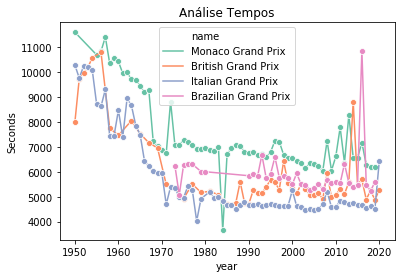

In [22]:
sns.lineplot(data=formula_1_speed, x="year", y="Seconds", hue="name", marker="o")
plt.title("Análise Tempos")

Análise: Podemos observar que aproximadamente no ano de 2010 houve uma mudança brusca na variação dos tempos que estavam em constante diminuição. Tal acontecimento foi ocasionado por uma série de mudanças em algumas regras da Fórmula 1, como: 

* **Volta da regra de 107%** (*Durante a qualificação, o piloto que não efetuar uma volta dentro de 107% do menor tempo na primeira sessão de qualificação não pode começar a corrida*);
* **Proibição de ordens de equipe** (*Equipe não pode exigir ultrapassagens para favorecer um determinado piloto*);  
* **Novas normas técnicas impostas pela pirelli;**  
* **Mudanças na aerodinâmica dos carros;**  
* **Leve aumento do peso mínimo dos veículos;**  
* **Impedimento de acessar o circuito 9 horas antes da primeira sessão do dia.**

Essas mudanças favoreceram a segurança dos pilotos e de todas as pessoas envolvidas na organização da corrida, como pode ser observado no gráfico abaixo:

Text(0.5, 1.0, 'Acidentes por temporada')

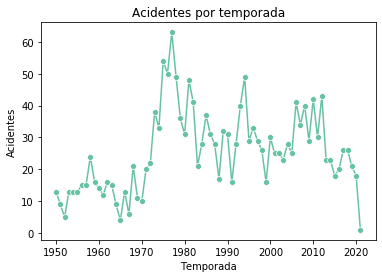

In [23]:
sns.lineplot(data=newdata, x="Temporada", y="Acidentes", marker="o")
plt.title("Acidentes por temporada")

Análise: Houve uma **diminuição** na **quantidade de acidentes** por volta da temporada de **2013**, demostrando a eficácia das **novas normas** impostas pela FIA (Federação Internacional do Automóvel). Em suma, os carros se tornaram levemente mais lentos, mas as corridas se tornaram **mais seguras**, o que eticamente foi a decisão mais correta para evitar a **morte de profissionais** deste esporte, como a trágica morte de **Ayrton Senna** em 1° de Maio de 1994, que perdeu o controle do carro e se chocou contra o muro, fazendo com que o braço direito da suspensão dianteira saísse em direção à sua cabeça acertando-o justo abaixo da viseira. 

<img src="Ayrton_Senna.jpg" style="width:422.5px;height:325px"/>

## Porcentagem Pole-Vitória
Na Fórmula 1 os pilotos fazem um **treino qualificatória** na pista para decidir as posições de largada da corrida, o piloto que tem o **tempo mais rápido** neste treino larga em primeiro, ele possui o que é chamado de **Pole Position** ( _Primeira Posição_ ). O piloto que larga em primeiro tem a **vantagem**, mas nem sempre ele é o que vence a corrida, as vezes um piloto
retardatário rouba-lhe a vitória, é por isso que vamos analisar a **porcentagem de vitória** dos pilotos que largam em 1°, 2° e 3° lugar.

In [24]:
soma_p = formula_1['Posição_Final'].sum()

soma_grid = formula_1[formula_1.grid == 1]
soma_grid = soma_grid["grid"].count()
porc = (soma_grid * 100) / soma_p

soma_grid_2 = formula_1[formula_1.grid == 2]
soma_grid_2 = soma_grid_2["grid"].count()
porc_2 = (soma_grid_2 * 100) / soma_p

soma_grid_3 = formula_1[formula_1.grid == 3]
soma_grid_3 = soma_grid_3["grid"].count()
porc_3 = (soma_grid_3 * 100) / soma_p

In [25]:
valores_dict = {"Q1":porc, "Q2":porc_2, "Q3":porc_3}
valores_dict_2 = {"Q1":"1°", "Q2":"2°", "Q3":"3°"}

valores = pd.Series(valores_dict)
valores_2 = pd.Series(valores_dict_2)

porc_valores = pd.DataFrame({"Saída":valores_2 ,"Porcentagem":valores_dict})
porc_valores

,Saída,Porcentagem
Q1,1°,41.87
Q2,2°,23.97
Q3,3°,12.32


Análise: Podemos observar que a diferença entre essas 3 posições cai quase **pela metade** quando vamos aumentando uma posição, além disso podemos ver que apenas **41,87%** dos pilotos que largaram na primeira posição em toda a história ganharam a corrida, então **mais da metade** desses pilotos **não conseguiram** a **vitória** após terem obtido o melhor tempo no treino classificatório, tal fato demonstra o quão **imprevisíveis** são as corridas da Fórmula 1.

# Dados Monaco (1950-1968) e (2005-2019)

Aqui iremos calcular o Z-score de pilotos de diferentes épocas da Fórmula 1, e analisaremos qual piloto se sairia melhor se corresse em mesmas condições atualmente. 

## Monaco (1950-1968)

In [26]:
Monaco_1 = formula_1[formula_1.circuitId == 6]
Monaco_1 = Monaco_1[Monaco_1.year <= 1968]
Monaco_1 = Monaco_1.sort_values(by="time")
Monaco_1 = Monaco_1.drop(["raceId","round","driverId","circuitId",
                          "code","constructorId","fastestLapTime","fastestLapSpeed"], axis=1)
Monaco_1 = Monaco_1.reset_index(drop=True)

#Transformando tempo em str para segundos.
Monaco_1_time = Monaco_1["time"]
Monaco_1_dt = pd.to_datetime(Monaco_1_time, format='%H:%M:%S.%f', errors='ignore')
Monaco_1_seconds = (Monaco_1_dt.dt.hour*60+Monaco_1_dt.dt.minute)*60 + Monaco_1_dt.dt.second
Monaco_1["Seconds"] = Monaco_1_seconds

Monaco_1["Zscore"] = (Monaco_1.Seconds - Monaco_1.Seconds.mean())/Monaco_1.Seconds.std()
Monaco_1["Pilotos"] = Monaco_1["Pilotos"].drop_duplicates()
Monaco_1 = Monaco_1.dropna()
Monaco_1 = Monaco_1.reset_index(drop=True)
Monaco_1

,name,date,year,Pilotos,nationality,Montadoras,grid,Posição_Final,time,Seconds,Zscore
0,Monaco Grand Prix,1968-05-26,1968,Graham Hill,British,Lotus-Ford,1,1,2:00:32.3,7232,-2.64
1,Monaco Grand Prix,1966-05-22,1966,Jackie Stewart,British,BRM,3,1,2:33:10.5,9190,-0.79
2,Monaco Grand Prix,1967-05-07,1967,Denny Hulme,New Zealander,Brabham-Repco,4,1,2:34:34.3,9274,-0.71
3,Monaco Grand Prix,1961-05-14,1961,Stirling Moss,British,Lotus-Climax,1,1,2:45:50.1,9950,-0.07
4,Monaco Grand Prix,1962-06-03,1962,Bruce McLaren,New Zealander,Cooper-Climax,3,1,2:46:29.7,9989,-0.03
5,Monaco Grand Prix,1958-05-18,1958,Maurice Trintignant,French,Cooper,5,1,2:52:27.9,10347,0.31
6,Monaco Grand Prix,1959-05-10,1959,Jack Brabham,Australian,Cooper-Climax,3,1,2:55:51.3,10551,0.50
7,Monaco Grand Prix,1957-05-19,1957,Juan Fangio,Argentine,Maserati,1,1,3:10:12.8,11412,1.31


Text(0.5, 1.0, 'Monaco (1950-1968)')

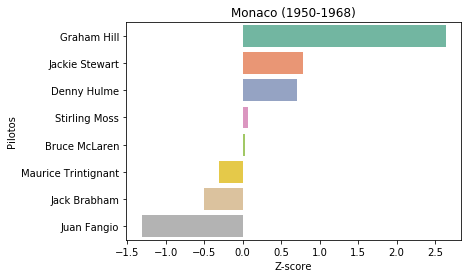

In [42]:
Monaco_1["Z-score"] = Monaco_1["Zscore"] * -1
sns.barplot(data=Monaco_1, x="Z-score", y="Pilotos")
plt.title("Monaco (1950-1968)")

## Monaco (2005-2019)

In [28]:
Monaco_2 = formula_1[formula_1.circuitId == 6]
Monaco_2 = Monaco_2[Monaco_2.year >= 2005]
Monaco_2 = Monaco_2.sort_values(by="time")
Monaco_2 = Monaco_2.drop(["raceId","round","driverId","circuitId","constructorId","fastestLapSpeed","fastestLapTime"], axis=1)
Monaco_2 = Monaco_2.reset_index(drop=True)

Monaco_2_time = Monaco_2["time"]
Monaco_2_dt = pd.to_datetime(Monaco_2_time, format='%H:%M:%S.%f', errors='ignore')
Monaco_2_seconds = (Monaco_2_dt.dt.hour*60+Monaco_2_dt.dt.minute)*60 + Monaco_2_dt.dt.second
Monaco_2["Seconds"] = Monaco_2_seconds

Monaco_2["Zscore"] = (Monaco_2.Seconds - Monaco_2.Seconds.mean())/Monaco_2.Seconds.std()
Monaco_2["Pilotos"] = Monaco_2["Pilotos"].drop_duplicates()
Monaco_2 = Monaco_2.dropna()
Monaco_2 = Monaco_2.reset_index(drop=True)
Monaco_2

,name,date,year,Pilotos,code,nationality,Montadoras,grid,Posição_Final,time,Seconds,Zscore
0,Monaco Grand Prix,2007-05-27,2007,Fernando Alonso,ALO,Spanish,McLaren,1,1,1:40:29.329,6029,-0.94
1,Monaco Grand Prix,2009-05-24,2009,Jenson Button,BUT,British,Brawn,1,1,1:40:44.282,6044,-0.92
2,Monaco Grand Prix,2018-05-27,2018,Daniel Ricciardo,RIC,Australian,Red Bull,1,1,1:42:54.807,6174,-0.72
3,Monaco Grand Prix,2019-05-26,2019,Lewis Hamilton,HAM,British,Mercedes,1,1,1:43:28.437,6208,-0.67
4,Monaco Grand Prix,2017-05-28,2017,Sebastian Vettel,VET,German,Ferrari,2,1,1:44:44.340,6284,-0.56
5,Monaco Grand Prix,2005-05-22,2005,Kimi Räikkönen,RAI,Finnish,McLaren,1,1,1:45:15.556,6315,-0.51
6,Monaco Grand Prix,2012-05-27,2012,Mark Webber,WEB,Australian,Red Bull,1,1,1:46:06.557,6366,-0.44
7,Monaco Grand Prix,2015-05-24,2015,Nico Rosberg,ROS,German,Mercedes,2,1,1:49:18.420,6558,-0.15


Text(0.5, 1.0, 'Monaco (2005-2019)')

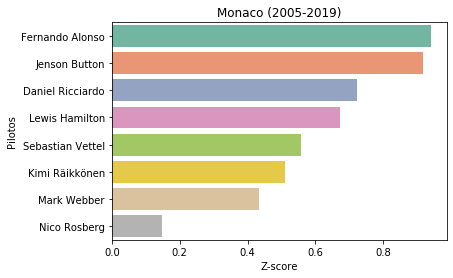

In [43]:
Monaco_2["Z-score"] = Monaco_2["Zscore"] * -1
sns.barplot(data=Monaco_2, x="Z-score", y="Pilotos")
plt.title("Monaco (2005-2019)")

## Graham Hill x Fernando Alonso	

In [30]:
Monaco_a = {"Ano": "1950-1968",
                "Fastest Pilot T": Monaco_1["time"][0],
                    "Fastest Pilot S": Monaco_1["Seconds"][0],
                        "Média": Monaco_1["Seconds"].mean(),
                          "Desvio Padrão": Monaco_1["Seconds"].std(),
                               "Zscore": Monaco_1["Zscore"][0]}

Monaco_b = {"Ano": "2005-2019",
                "Fastest Pilot T": Monaco_2["time"][0],
                    "Fastest Pilot S": Monaco_2["Seconds"][0],
                        "Média": Monaco_2["Seconds"].mean(),
                          "Desvio Padrão": Monaco_2["Seconds"].std(),
                              "Zscore": Monaco_2["Zscore"][0]}

medidas_a = pd.Series(Monaco_a)
medidas_b = pd.Series(Monaco_b)

d_ab_medidas = pd.DataFrame({"Monaco_1": medidas_a, "Monaco_2": medidas_b})
d_ab_medidas

,Monaco_1,Monaco_2
Ano,1950-1968,2005-2019
Fastest Pilot T,2:00:32.3,1:40:29.329
Fastest Pilot S,7232,6029
Média,9743.12,6247.25
Desvio Padrão,1238.52,174.22
Zscore,-2.64,-0.94


Análise: Vemos que o piloto **Graham Hill** está com um Z-score de **-2.64** desvios padrões abaixo da média, enquanto **Fernando Alonso** está apenas **-0.94**, podemos observar no gráfico de barra como Graham se saiu melhor entre os seus oponentes, a partir deste fato supomos que ou Hill era forte de mais em comparação aos outros pilotos, ou eles que eram muito fracos, ou talvez um pouco dos dois. Já no caso de Alonso, a disputa é visivelmente mais equilibrada, mostrando como os pilotos estão em um patamar parecido. Em uma suposta **disputa** entre **Graham** e **Alonso**, baseado nestes dados, pode-se inferir que talvez Graham venceria o confronto. É claro que só estamos levando em conta 1 fator neste caso, se fizéssemos uma análise mais profunda dos dados, teríamos resultados mais precisos.

# Dados Monza (1950-1964) e (2006-2020)

## Monza (1950-1964)

In [31]:
Monza_1 = formula_1[formula_1.circuitId == 14]
Monza_1 = Monza_1[Monza_1.year <= 1964]
Monza_1 = Monza_1.sort_values(by="time")
Monza_1 = Monza_1.drop(["raceId","round","driverId","circuitId",
                          "code","constructorId","fastestLapTime","fastestLapSpeed"], axis=1)
Monza_1 = Monza_1.reset_index(drop=True)

#Transformando tempo em str para segundos.
Monza_1_time = Monza_1["time"]
Monza_1_dt = pd.to_datetime(Monza_1_time, format='%H:%M:%S.%f', errors='ignore')
Monza_1_seconds = (Monza_1_dt.dt.hour*60+Monza_1_dt.dt.minute)*60 + Monza_1_dt.dt.second
Monza_1["Seconds"] = Monza_1_seconds

Monza_1["Zscore"] = (Monza_1.Seconds - Monza_1.Seconds.mean())/Monza_1.Seconds.std()
Monza_1["Pilotos"] = Monza_1["Pilotos"].drop_duplicates()
Monza_1 = Monza_1.dropna()
Monza_1 = Monza_1.reset_index(drop=True)
Monza_1

,name,date,year,Pilotos,nationality,Montadoras,grid,Posição_Final,time,Seconds,Zscore
0,Italian Grand Prix,1961-09-10,1961,Phil Hill,American,Ferrari,4,1,2:03:13.0,7393,-1.42
1,Italian Grand Prix,1958-09-07,1958,Tony Brooks,British,Vanwall,2,1,2:03:47.8,7427,-1.38
2,Italian Grand Prix,1959-09-13,1959,Stirling Moss,British,Cooper-Climax,1,1,2:04:05.4,7445,-1.37
3,Italian Grand Prix,1964-09-06,1964,John Surtees,British,Ferrari,1,1,2:10:51.8,7851,-0.98
4,Italian Grand Prix,1963-09-08,1963,Jim Clark,British,Lotus-Climax,3,1,2:24:19.6,8659,-0.22
5,Italian Grand Prix,1955-09-11,1955,Juan Fangio,Argentine,Mercedes,1,1,2:25:04.4,8704,-0.18
6,Italian Grand Prix,1962-09-16,1962,Graham Hill,British,BRM,2,1,2:29:08.4,8948,0.05
7,Italian Grand Prix,1951-09-16,1951,Alberto Ascari,Italian,Ferrari,3,1,2:42:39.3,9759,0.82
8,Italian Grand Prix,1950-09-03,1950,Nino Farina,Italian,Alfa Romeo,3,1,2:51:17.4,10277,1.31


Text(0.5, 1.0, 'Monza (1950-1964)')

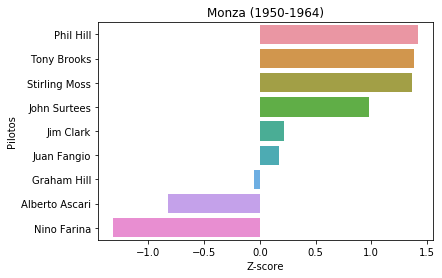

In [38]:
Monza_1["Z-score"] = Monza_1["Zscore"] * -1
sns.barplot(data=Monza_1, x="Z-score", y="Pilotos")
plt.title("Monza (1950-1964)")

## Monza (2006-2020)

In [33]:
Monza_2 = formula_1[formula_1.circuitId == 14]
Monza_2 = Monza_2[Monza_2.year >= 2006]
Monza_2 = Monza_2.sort_values(by="time")
Monza_2 = Monza_2.drop(["raceId","round","driverId","circuitId","constructorId","fastestLapSpeed","fastestLapTime"], axis=1)
Monza_2 = Monza_2.reset_index(drop=True)

Monza_2_time = Monza_2["time"]
Monza_2_dt = pd.to_datetime(Monza_2_time, format='%H:%M:%S.%f', errors='ignore')
Monza_2_seconds = (Monza_2_dt.dt.hour*60+Monza_2_dt.dt.minute)*60 + Monza_2_dt.dt.second
Monza_2["Seconds"] = Monza_2_seconds

Monza_2["Zscore"] = (Monza_2.Seconds - Monza_2.Seconds.mean())/Monza_2.Seconds.std()
Monza_2["Pilotos"] = Monza_2["Pilotos"].drop_duplicates()
Monza_2 = Monza_2.dropna()
Monza_2 = Monza_2.drop(14)
Monza_2 = Monza_2.reset_index(drop=True)
Monza_2

,name,date,year,Pilotos,code,nationality,Montadoras,grid,Posição_Final,time,Seconds,Zscore
0,Italian Grand Prix,2006-09-10,2006,Michael Schumacher,MSC,German,Ferrari,2,1,1:14:51.975,4491,-0.66
1,Italian Grand Prix,2019-09-08,2019,Charles Leclerc,LEC,Monegasque,Ferrari,1,1,1:15:26.665,4526,-0.58
2,Italian Grand Prix,2017-09-03,2017,Lewis Hamilton,HAM,British,Mercedes,1,1,1:15:32.312,4532,-0.57
3,Italian Grand Prix,2009-09-13,2009,Rubens Barrichello,BAR,Brazilian,Brawn,5,1,1:16:21.706,4581,-0.47
4,Italian Grand Prix,2010-09-12,2010,Fernando Alonso,ALO,Spanish,Ferrari,1,1,1:16:24.572,4584,-0.46
5,Italian Grand Prix,2016-09-04,2016,Nico Rosberg,ROS,German,Mercedes,2,1,1:17:28.089,4648,-0.33
6,Italian Grand Prix,2013-09-08,2013,Sebastian Vettel,VET,German,Red Bull,1,1,1:18:33.352,4713,-0.19


Text(0.5, 1.0, 'Monza (2006-2020)')

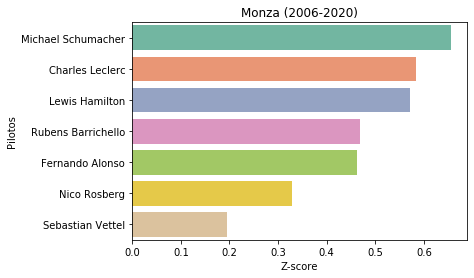

In [39]:
Monza_2["Z-score"] = Monza_2["Zscore"] * -1
sns.barplot(data=Monza_2, x="Z-score", y="Pilotos")
plt.title("Monza (2006-2020)")

## Phil Hill x Michael Schumacher

In [35]:
Monza_a = {"Ano": "1950-1964",
                "Fastest Pilot T": Monza_1["time"][0],
                    "Fastest Pilot S": Monza_1["Seconds"][0],
                        "Média": Monza_1["Seconds"].mean(),
                          "Desvio Padrão": Monza_1["Seconds"].std(),
                               "Zscore": Monza_1["Zscore"][0]}

Monza_b = {"Ano": "2006-2020",
                "Fastest Pilot T": Monza_2["time"][0],
                    "Fastest Pilot S": Monza_2["Seconds"][0],
                        "Média": Monza_2["Seconds"].mean(),
                          "Desvio Padrão": Monza_2["Seconds"].std(),
                              "Zscore": Monza_2["Zscore"][0]}

medidas_a = pd.Series(Monza_a)
medidas_b = pd.Series(Monza_b)

d_ab_medidas = pd.DataFrame({"Monza_1": medidas_a, "Monza_2": medidas_b})
d_ab_medidas

,Monza_1,Monza_2
Ano,1950-1964,2006-2020
Fastest Pilot T,2:03:13.0,1:14:51.975
Fastest Pilot S,7393,4491
Média,8495.89,4582.14
Desvio Padrão,1056.01,76.85
Zscore,-1.42,-0.66


Análise: Assim como no caso acima vemos que novamente o piloto das primeiras décadas da Fórmula 1, talvez levasse a melhor contra um piloto do século 21. **Phil Hill** teve um Z-score de **-1.42** enquanto **Michael Schumacher** teve apenas **-0.66**, observando novamente o gráfico de barra, vemos que a disputa de Phil foi um pouco mais acirrada em relação ao GP de Monaco, já no caso de Schumacher novamente vemos uma disputa bastante equilibrada. Precisamos pontuar que os carros atualmente são bem **mais tecnológicos** que os antigos, nos levando a imaginar os **grandes feitos** que os pilotos das primeiras décadas realizariam se corressem hoje em dia. Infelizmente as suposições que levantamos não podem ser provadas na prática, mas temos os **dados** para **analisar** e **imaginar** o que possivelmente aconteceria.

# Conclusão

Durante esses **71 anos** da Fórmula 1, muitos dados foram gerados, principalmente agora no último século onde os carros possuem
    muita tecnologia para **calcular, medir e analisar** o desempenho dos pilotos e dos carros. Encontramos os pilotos mais vencedores, assim como as montadoras, acompanhamos a evolução das velocidades, o aumento do número de acidentes e as medidas de segurança que foram tomadas para garantir a segurança dos pilotos. Foi necessário um **grande processo de limpeza** pelo fato de existir uma grande quantidade de dados de todos esses anos, além disso nas primeiras décadas da Fórmula 1, muitos dados como tempos dos pilotos retardatários não foram registrados, dificultando a análise em alguns casos, ademais temos limitações pelo básico de conhecimento que ainda possuímos. Futuramente podemos **refazer essas análises** com os próximos anos e analisar possíveis **mudanças nos resultados**. Independente de qualquer coisa esse é um esporte que sempre estará em constante **evolução**.